In [2]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

# plot options
rc = {"text.usetex": True,
      "font.family": "serif",
      "font.sans-serif": ["Computer Modern"]
     }
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [3]:
def irr_m (x, a):
    return x*np.sqrt((1 + np.sqrt(1 - a**2))/2)

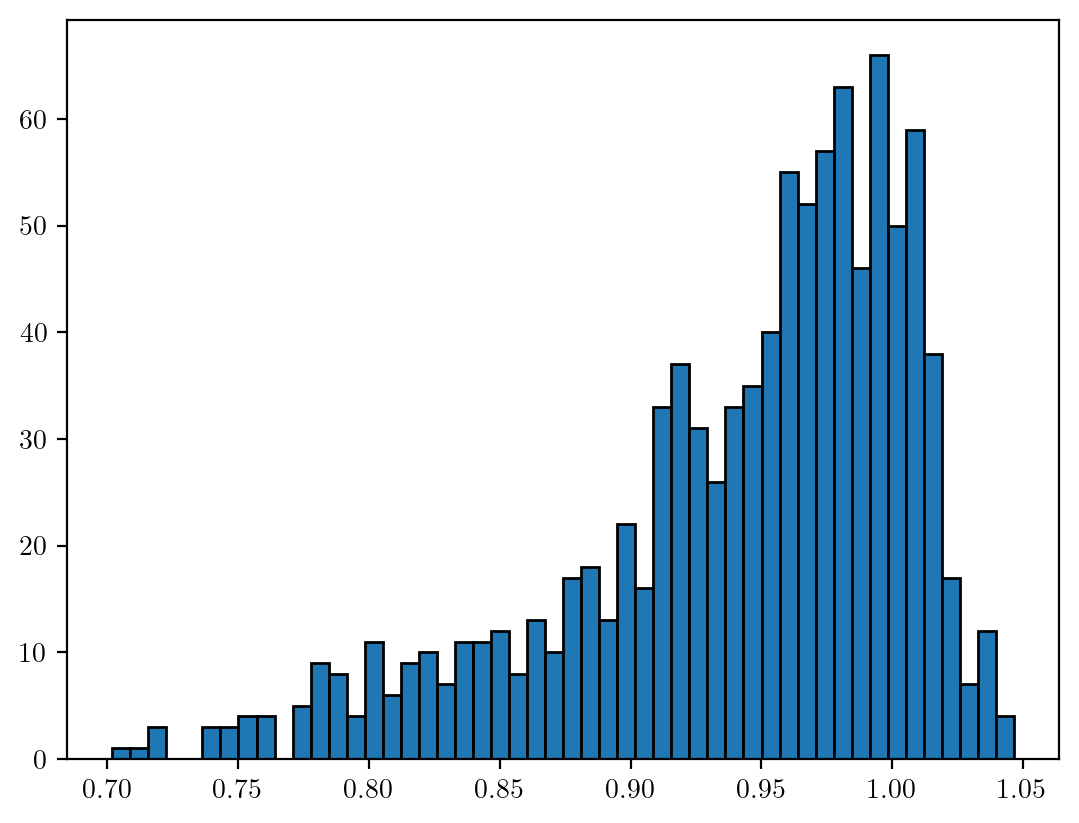

In [5]:
N = 1000

a = np.random.uniform(0,1, N) #spin
mu, sigma  = (1,.02)
m = norm.rvs(mu, sigma, N)
y = irr_m(m, a)
plt.hist(y, bins = 50, edgecolor = 'black');

Let's try with vairable-width bin sizes that have the same number of objects in each bin

In [6]:
bins100 = np.append(np.sort(y)[::100], np.max(m)) 
bins30 = np.append(np.sort(y)[::30], np.max(m))
print(len(bins100),len(bins30))

11 35


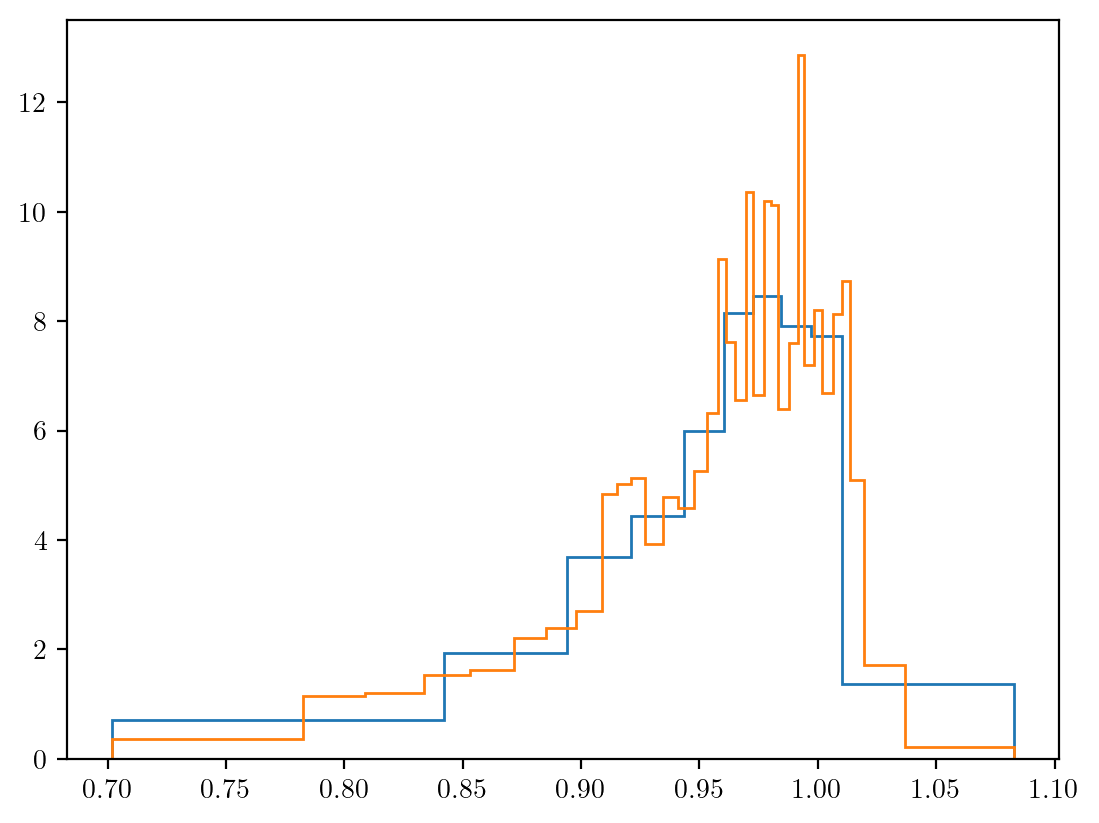

In [7]:
#Note that the underscores and the semicolon at the end both suppress the array output so that we just see the plots
_ = plt.hist(y, bins=bins100, density=True, histtype="step") #Complete
plt.hist(y, bins=bins30, density=True, histtype="step"); #Complete

30 counts per bin seems pretty promising

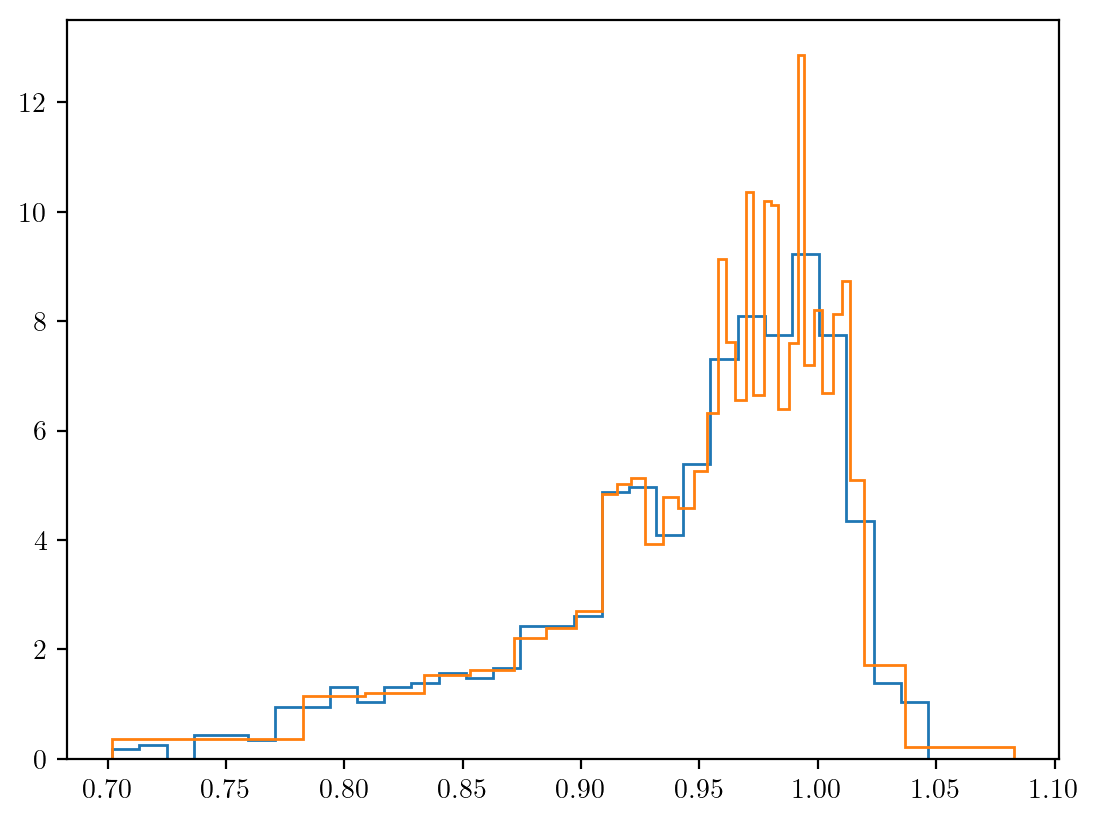

In [8]:
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(y, bins= bins30, density=True, histtype="step");

Now using kde

In [9]:
from sklearn.neighbors import KernelDensity
ygrid = np.linspace(y.min(),y.max(),1000)  # Use this instead of 'x' for plotting

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(ygrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

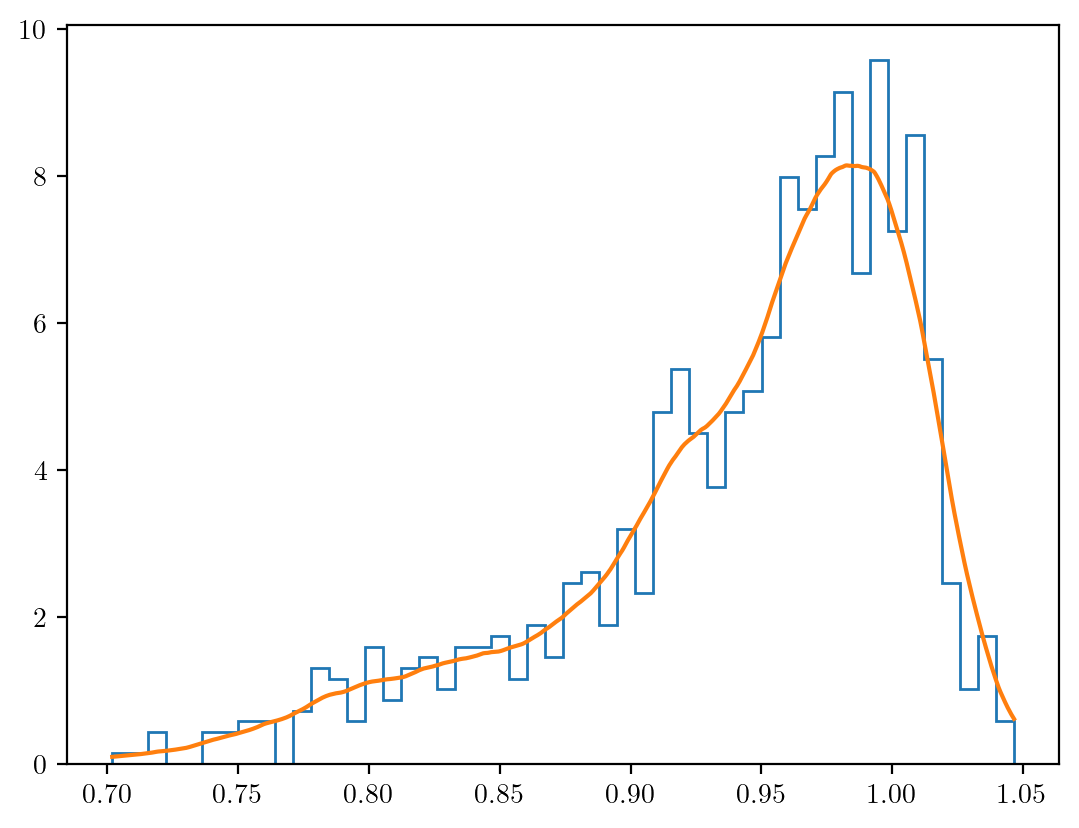

In [10]:
PDF = kde_sklearn(y,bandwidth=0.03,kernel="linear") #Complete
plt.hist(y, bins = 50, density=True, histtype="step")
plt.plot(ygrid,PDF); #Complete

Now let's compute the KS distance between $M_\text{irr}$ and $f$ as a function of $\sigma$ and then between $M_\text{irr}$ and $M$ as a function of $\sigma$

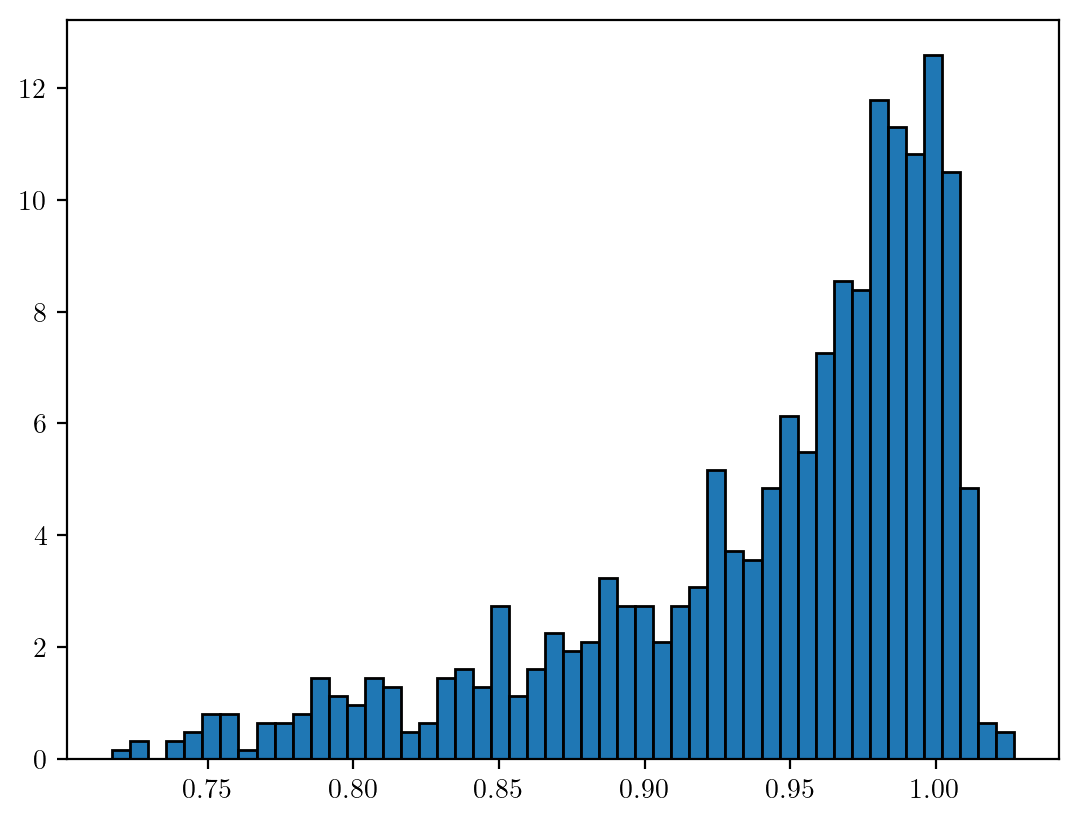

In [39]:
mu = 1
nsigma = 100
sigma = np.linspace(.01, 10, nsigma)

m = norm.rvs(mu, sigma[0], N)
y = irr_m(m, a)
plt.hist(y, bins = 50, density = True, edgecolor = 'black');

KstestResult(statistic=0.127, pvalue=1.9092886474554655e-07)


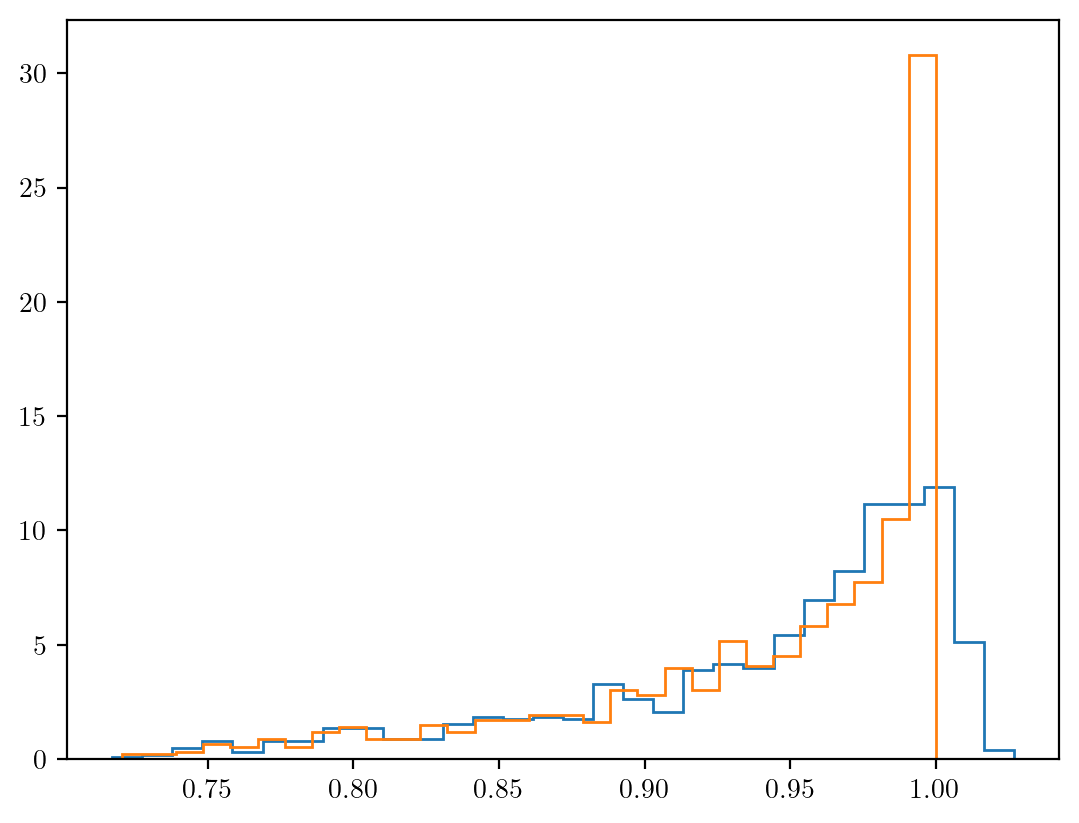

In [41]:
# the kstest function is appropriate for this
f = y/m
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(f, bins = 30, density=True, histtype="step")
print(stats.kstest(y,f))

KstestResult(statistic=0.619, pvalue=2.008330841445987e-179)


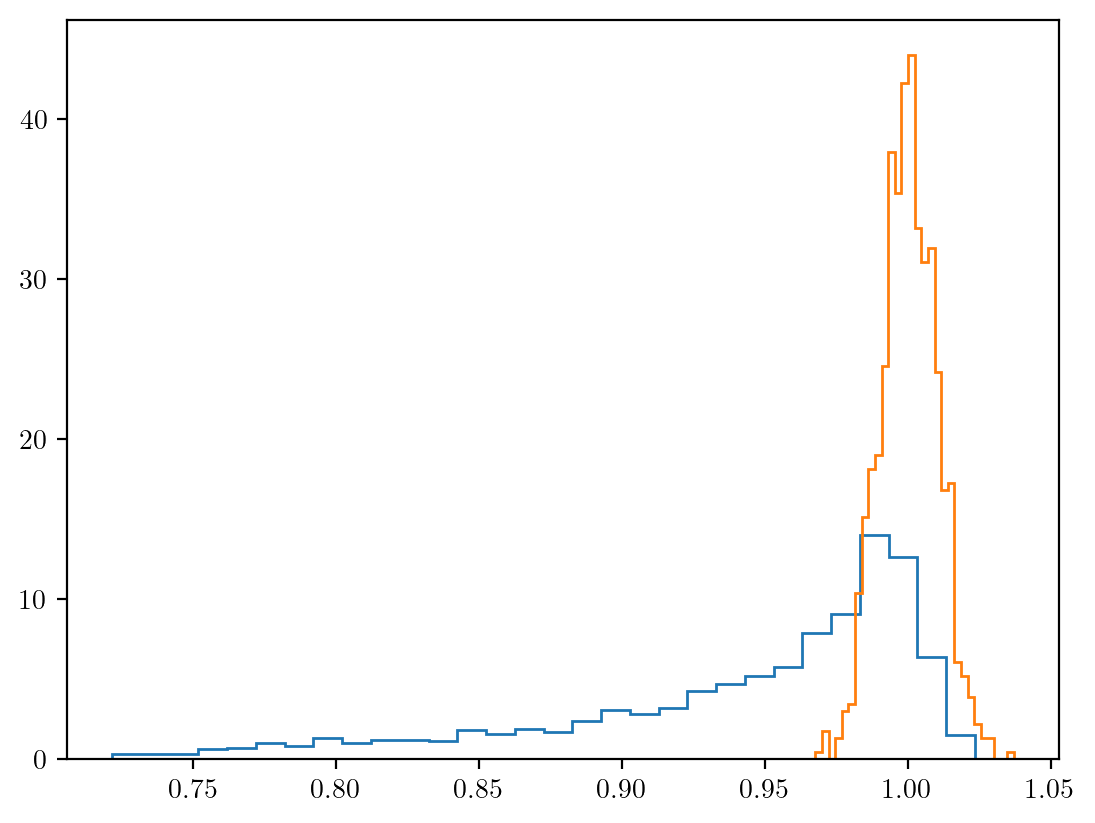

In [14]:
# the kstest function is appropriate for this
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(m, bins = 30, density=True, histtype="step")
print(stats.kstest(y,m))

# Different sigmas

Let's now implement this for different sigma, we can see how the shape of the data distribution changes with the sigma

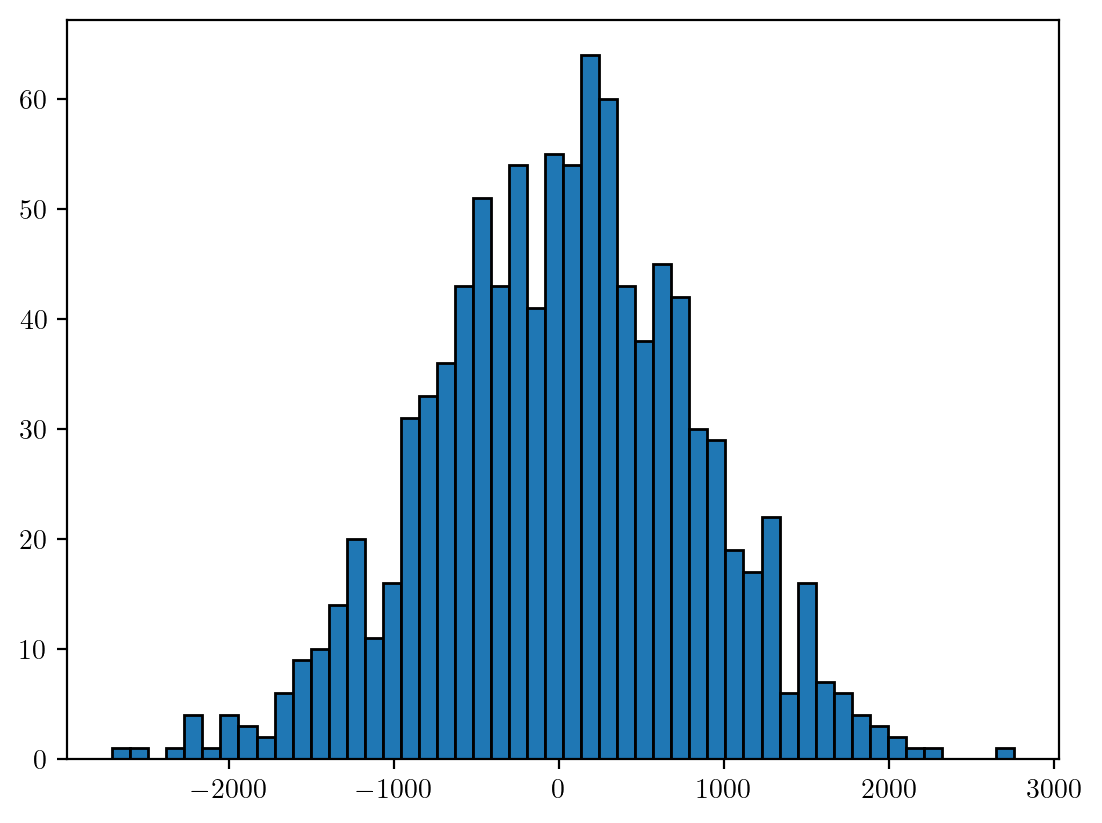

In [65]:
mu = 1
nsigma = 100
sigma = np.linspace(int(1e-3), int(1e3), nsigma)

m = norm.rvs(mu, sigma[-1], N)
y = irr_m(m, a)
plt.hist(y, bins = 50, edgecolor = 'black');

KstestResult(statistic=0.077, pvalue=0.005306868855560685)


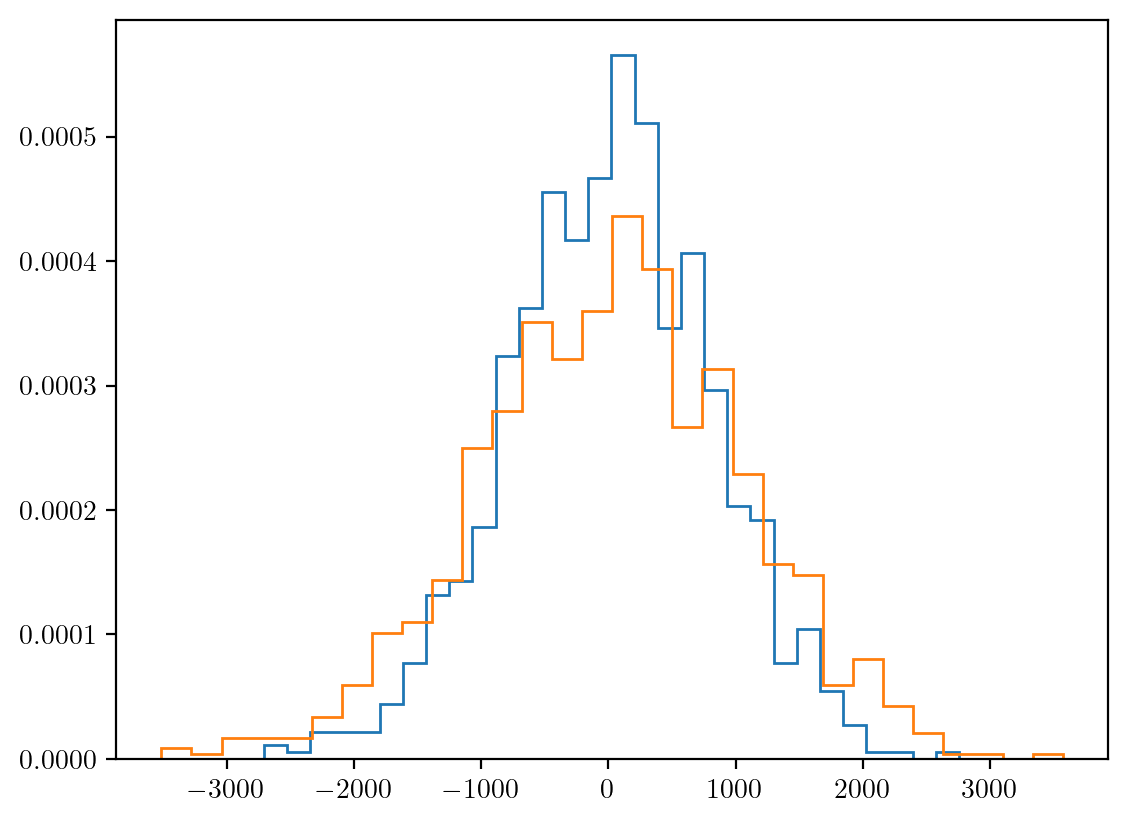

In [66]:
# the kstest function is appropriate for this
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(m, bins = 30, density=True, histtype="step")
print(stats.kstest(y,m))

/home/sam/miniconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/sam/miniconda3/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


KstestResult(statistic=0.521, pvalue=2.954780090542833e-124)


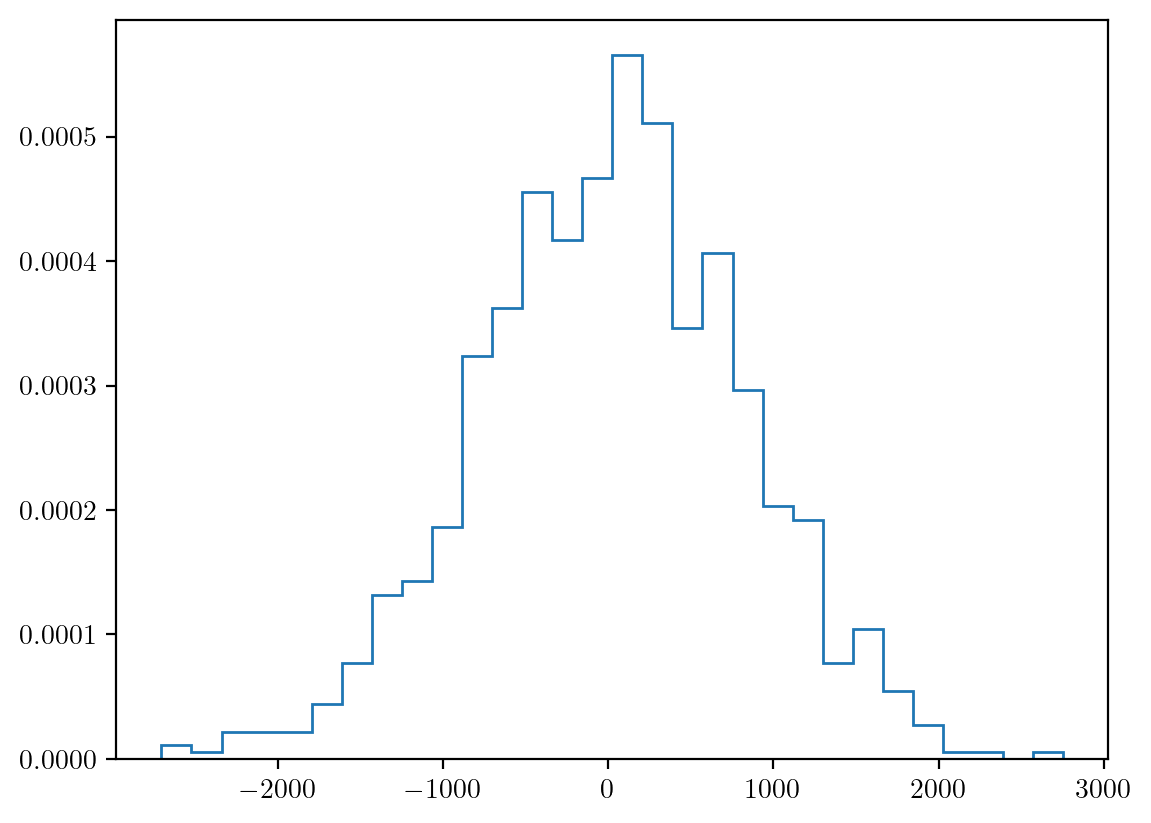

In [67]:
# the kstest function is appropriate for this
f = y/m
plt.hist(y, bins = 30, density=True, histtype="step")
plt.hist(f, bins = 30, density=True, histtype="step")
print(stats.kstest(f,y))

# Comparing 

We should find that $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$

In [68]:
ks_f = []
ks_m = []

for i in range(nsigma):
    a = np.random.uniform(0,1)
    m = norm.rvs(mu, sigma[i], N)
    y = irr_m(m, a)
    f = y/m
    ks_f.append(stats.kstest(y,f))
    ks_m.append(stats.kstest(y,m))
    # 0 entry gives the statistic (which is D, the maximum difference in the cdfs of two samples)
    # 1 entry gives pvalue
ks_f = np.array(ks_f)
ks_m = np.array(ks_m)

In [69]:
import pandas as pd

d = {'D_f': ks_f[:,0], 'D_m': ks_m[:,0],
     'p_f': ks_f[:,1], 'p_m': ks_m[:,1]
    }
df = pd.DataFrame(data = d, index=sigma.round(2))
display(df)

,D_f,D_m,p_f,p_m
0.0,0.000,1.000,1.000000e+00,0.000000
10.1,0.508,0.009,7.758326e-118,1.000000
20.2,0.509,0.043,2.529553e-118,0.313680
30.3,0.505,0.035,2.202564e-116,0.572890
40.4,0.524,0.003,9.134976e-126,1.000000
...,...,...,...,...
959.6,0.514,0.016,8.949960e-121,0.999550
969.7,0.506,0.039,7.239503e-117,0.432609
979.8,0.521,0.059,2.954780e-124,0.061534
989.9,0.524,0.016,9.134976e-126,0.999550


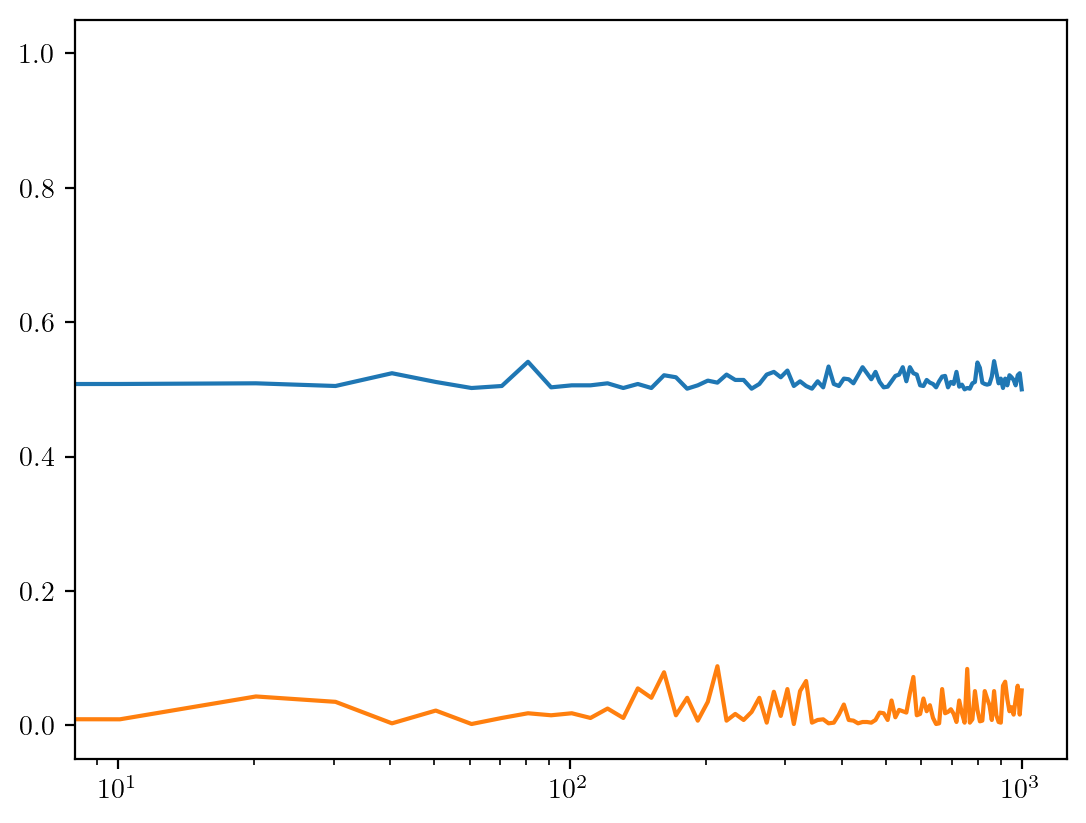

In [70]:
plt.plot(sigma, ks_f[:,0]);
plt.plot(sigma, ks_m[:,0]);
plt.semilogx();

Now we want to compute the pdfs of $M_\text{irr}$ from their mathematical definition, plot them and check if they agree with my KDE. To do this we need the pdf of f, which is of course different from the pdf of m